Connected to FF_DRL (Python 3.10.9)

In [121]:
import pandas as pd

In [122]:
df = pd.read_csv('logs/test_100ep.csv')
df2 = pd.read_csv('logs/test_rndAgent_100ep.csv')

In [123]:
df

,episode,rew
0,0,3.0
1,1,1.0
2,2,31.0
3,3,25.0
4,4,1.0
...,...,...
95,95,3.0
96,96,1.0
97,97,25.0
98,98,25.0


In [124]:
data = pd.merge(df, df2, on='episode', how='inner', suffixes=('_agent', '_rnd'))

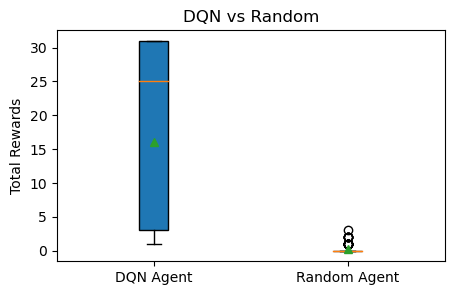

In [125]:


# Compute mean and std for each column
mean_std_values = data.describe().loc[['mean', 'std']]

# Create a box plot
plt.figure(figsize=(5, 3))

# Plot Boxplot for each column
box = plt.boxplot([data['rew_agent'], data['rew_rnd']], 
                  showmeans=True,
                  patch_artist=True)



plt.xticks([y + 1 for y in range(2)],
                  labels=['DQN Agent', 'Random Agent'])
plt.title('DQN vs Random')
plt.ylabel('Total Rewards')

# Show the plot
plt.show()

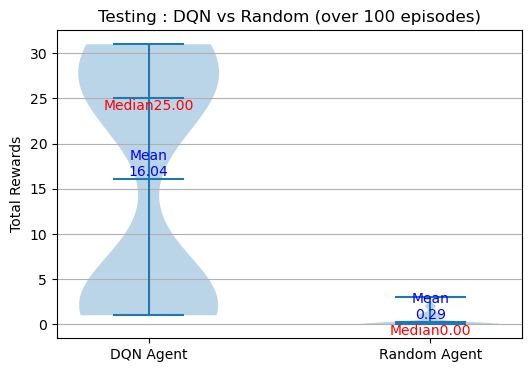

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('logs/test_100ep.csv')
df2 = pd.read_csv('logs/test_rndAgent_100ep.csv')
data = pd.merge(df, df2, on='episode', how='inner', suffixes=('_agent', '_rnd'))
fig, ax = plt.subplots(figsize=(6, 4))

# Plot violin plot
ax.violinplot([data['rew_agent'], data['rew_rnd']],
              showmeans=True,
              showmedians=True)


# Extract mean and median values for each group
means = [np.mean(column) for column in [data['rew_agent'], data['rew_rnd']]]
medians = [np.median(column) for column in [data['rew_agent'], data['rew_rnd']]]

# Label means and medians
for i, text in enumerate(['Mean', 'Median']):
    ax.text(i + 1, means[i], f'Mean\n{means[i]:.2f}', ha='center', va='bottom', color='blue', fontsize=10)
    ax.text(i + 1, medians[i], f'Median{medians[i]:.2f}', ha='center', va='top', color='red', fontsize=10)


ax.set_title('Testing : DQN vs Random (over 100 episodes)')
ax.set_xticks([1, 2])
ax.set_xticklabels(['DQN Agent', 'Random Agent'])
ax.set_ylabel('Total Rewards')

# Adding horizontal grid lines
ax.yaxis.grid(True)

plt.show()

In [127]:
(df['rew']==31).sum()

26

# Forward Forward breakout plottings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dff = pd.read_csv('logs1.csv')
df_rnd = pd.read_csv('logs/test_rndAgent_100ep.csv')
# Set 'ep' as the index
dff.set_index('ep', inplace=True)
# Set 'episode' as the index for the new DataFrame
dff

,rew
ep,
5,0.0
10,0.0
15,0.0
20,0.0
25,0.0
...,...
7655,2.0
7660,1.0
7665,4.0


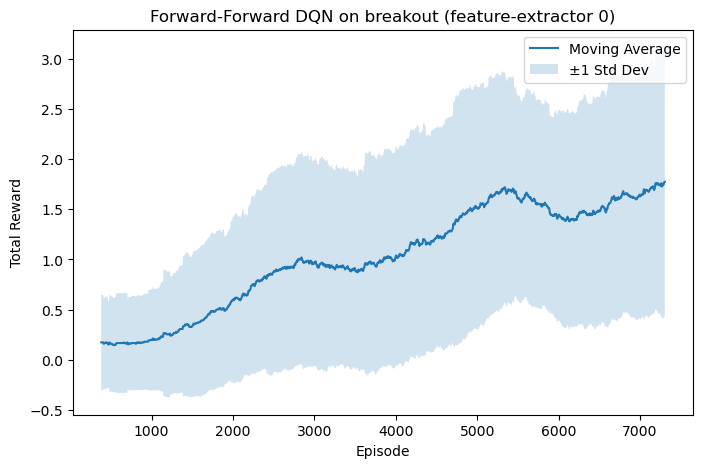

In [2]:
dff['mov_avg'] = dff['rew'].rolling(window=150, center=True).mean()
dff['mov_std'] = dff['rew'].rolling(window=150, center=True).std()



# Plotting
plt.figure(figsize=(8, 5))

# Plot the moving average
plt.plot(dff['mov_avg'], label='Moving Average')

# Fill the area between moving average + 1 standard deviation and moving average - 1 standard deviation
plt.fill_between(dff.index, dff['mov_avg'] - dff['mov_std'], dff['mov_avg'] + dff['mov_std'], alpha=0.2, label='±1 Std Dev')

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Forward-Forward DQN on breakout (feature-extractor 0)')
plt.legend()
plt.show()

In [5]:
df_rnd = pd.read_csv('logs/test_rndAgent_100ep.csv')
# Repeat df_rnd until it matches or exceeds the length of dff
while len(df_rnd) < len(dff):
    df_rnd = pd.concat([df_rnd, df_rnd])
df_rnd.reset_index(drop=True, inplace=True)
df_rnd.drop(columns='episode', inplace=True)
df_rnd.index = df_rnd.index*5
df_rnd.index.rename('ep',inplace=True)
df_rnd = df_rnd.loc[df_rnd.index <= 7675]
df_rnd['rew'] = np.random.permutation(df_rnd['rew'].values)
df_rnd['mov_avg'] = df_rnd['rew'].rolling(window=150, center=True).mean()
df_rnd['mov_std'] = df_rnd['rew'].rolling(window=150, center=True).std()

df_rnd.tail()

,rew,mov_avg,mov_std
ep,,,
7655,0.0,NaN,NaN
7660,0.0,NaN,NaN
7665,0.0,NaN,NaN
7670,1.0,NaN,NaN
7675,2.0,NaN,NaN


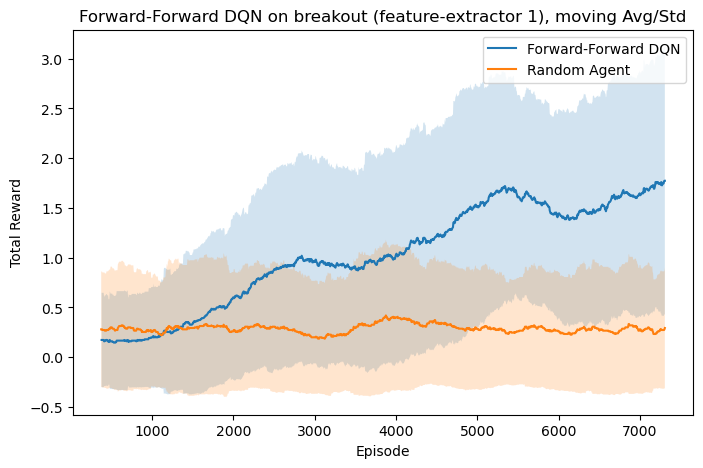

In [7]:
data = pd.merge(dff, df_rnd, how='left', on='ep')

# Plotting
plt.figure(figsize=(8, 5))

# Plot the moving average
plt.plot(data['mov_avg_x'], label='Forward-Forward DQN')

# Fill the area between moving average + 1 standard deviation and moving average - 1 standard deviation
plt.fill_between(data.index, data['mov_avg_x'] - data['mov_std_x'], data['mov_avg_x'] + data['mov_std_x'], alpha=0.2)


# Plot the moving average
plt.plot(data['mov_avg_y'], label='Random Agent')
# Fill the area between moving average + 1 standard deviation and moving average - 1 standard deviation
plt.fill_between(data.index, data['mov_avg_y'] - data['mov_std_y'], data['mov_avg_y'] + data['mov_std_y'], alpha=0.2)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Forward-Forward DQN on breakout (feature-extractor 1), moving Avg/Std')
plt.legend()
plt.show()